In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
data, target = mnist["data"], mnist["target"]

print(f"data의 type   : {type(data)},  data의 shape : {data.shape}")
print(f"target의 type : {type(target)},    target의 shape : {target.shape}")

data의 type   : <class 'pandas.core.frame.DataFrame'>,  data의 shape : (70000, 784)
target의 type : <class 'pandas.core.series.Series'>,    target의 shape : (70000,)


In [4]:
target.dtypes

CategoricalDtype(categories=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], ordered=False)

In [5]:
target = target.astype(np.int8)
data, target = data.values, target.values

print(f"data의 type   : {type(data)},  data의 shape : {data.shape}")
print(f"target의 type : {type(target)},    target의 shape : {target.shape}")

data의 type   : <class 'numpy.ndarray'>,  data의 shape : (70000, 784)
target의 type : <class 'numpy.ndarray'>,    target의 shape : (70000,)


In [6]:
print(target[10:20])

[3 5 3 6 1 7 2 8 6 9]


In [7]:
target_dict = {}
label, freq = np.unique(target, return_counts=True)

for l, f in zip(label, freq):
    target_dict[l] = f
    
print(target_dict)

{0: 6903, 1: 7877, 2: 6990, 3: 7141, 4: 6824, 5: 6313, 6: 6876, 7: 7293, 8: 6825, 9: 6958}


In [8]:
print(np.max(data), np.min(data))

data = data / 255      # To keep our gradients manageable
print(np.max(data), np.min(data))

255.0 0.0
1.0 0.0


In [9]:
digits = 10
examples = target.shape[0]     # 70000
target_new = np.eye(digits)[target.reshape(1, -1)]

In [10]:
print(f"target_new의 shape : {target_new.shape}")
print()
print(target[10:20])
print()
print(target_new[0, 10:20, :])

target_new의 shape : (1, 70000, 10)

[3 5 3 6 1 7 2 8 6 9]

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [11]:
target_new = target_new.reshape(-1, 10)
print(f"target의 shape : {target_new.shape}")
print()
print(target_new[10:20, :])

target의 shape : (70000, 10)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [12]:
m = 60000
m_test = data.shape[0] - m

x_train, x_test = data[:m].T, data[m:].T
y_train, y_test = target_new[:m].T, target_new[m:].T

print(f"x_train의 shape : {x_train.shape},     y_train의 shape : {y_train.shape}")
print(f"x_test의 shape  : {x_test.shape},     y_test의 shape  : {y_test.shape}")

x_train의 shape : (784, 60000),     y_train의 shape : (10, 60000)
x_test의 shape  : (784, 10000),     y_test의 shape  : (10, 10000)


In [13]:
np.random.seed(2023)

shuffle_index = np.random.permutation(m)
x_train, y_train = x_train[:, shuffle_index], y_train[:, shuffle_index]

print(f"x_train의 shape : {x_train.shape},     y_train의 shape : {y_train.shape}")
print(f"x_test의 shape  : {x_test.shape},     y_test의 shape  : {y_test.shape}")

x_train의 shape : (784, 60000),     y_train의 shape : (10, 60000)
x_test의 shape  : (784, 10000),     y_test의 shape  : (10, 10000)


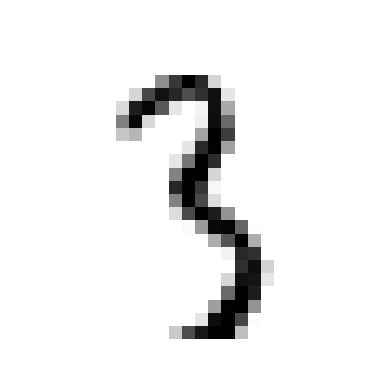

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [14]:
i = 2023
plt.imshow(x_train[:, i].reshape(28, 28), cmap=matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(y_train[:, i])

In [15]:
def sigmoid(z):
    s = 1.0 / (1.0 + np.exp(-z))
    return s

def compute_multiclass_loss(y, y_hat):
    L_sum = np.sum(np.multiply(y, np.log(y_hat)))
    m = y.shape[1]
    L = -(1.0/m) * L_sum
    return L

In [17]:
def feed_forward(X, params):
    cache = {}
    cache["Z0"] = np.matmul(params["W0"].T, X) + params["b0"]
    cache["A0"] = sigmoid(cache["Z0"])
    cache["Z1"] = np.matmul(params["W1"].T, cache["A0"]) + params["b1"]
    cache["A1"] = np.exp(cache["Z1"]) / np.sum(np.exp(cache["Z1"]), axis=0)
    return cache

In [18]:
def back_propagate(X, Y, params, cache, m_batch):
    delta1 = cache["A1"] - Y
    dw1 = (1.0/m_batch) * np.matmul(cache["A0"], delta1.T)
    db1 = (1.0/m_batch) * np.sum(delta1, axis=1, keepdims=True)
    
    delta0 = sigmoid(cache["Z0"]) * (1.0 - sigmoid(cache["Z0"])) * np.matmul(params["W1"], delta1.T) 
    dw0 = (1.0/m_batch) * np.matmul(X, delta0.T)
    db0 = (1.0/m_batch) * np.sum(delta0, axis=1, keepdims=True)